In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
print(df_train.shape)
print(df_test.shape)

(16431, 23)
(5478, 23)


In [4]:
df_train.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,\N,\N,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,"(5, 6]",1982,\N,\N,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,"(5, 6]",1992,\N,\N,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,"(5, 6]",2021,\N,\N,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,"(7, 8]",2020,2020,80,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


In [63]:
df_train.describe()

,startYear,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,awardNominationsExcludeWins,isAdult,numRegions,userReviewsTotal,ratingCount
count,16431.000000,13813.000000,16431.000000,16431.000000,16431.000000,16431.000000,16431.000000,16431.000000,16431.000000,16431.000000,16431.000000,16431.000000
mean,1991.867081,0.491855,1492.153551,11.477025,0.271499,61.341976,2.785527,0.558883,0.025927,3.549206,7.228410,1492.915039
std,26.120690,2.974264,20137.708096,74.254261,3.115448,174.017450,15.411389,3.955372,0.158921,5.854671,66.495606,20145.393446
min,1878.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000
25%,1978.000000,0.000000,15.000000,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
50%,1997.000000,0.000000,36.000000,1.000000,0.000000,34.000000,0.000000,0.000000,0.000000,1.000000,0.000000,36.000000
75%,2013.000000,0.000000,148.500000,6.000000,0.000000,65.000000,1.000000,0.000000,0.000000,3.000000,2.000000,149.000000
max,2024.000000,145.000000,966565.000000,3504.000000,258.000000,15742.000000,533.000000,197.000000,1.000000,69.000000,5727.000000,967042.000000


In [62]:
df_test.describe()

,startYear,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,awardNominationsExcludeWins,isAdult,numRegions,userReviewsTotal,ratingCount
count,5478.000000,4591.000000,5.478000e+03,5478.000000,5478.00000,5478.000000,5478.000000,5478.000000,5478.000000,5478.000000,5478.000000,5.478000e+03
mean,1991.676524,0.504901,1.524268e+03,10.677620,0.27218,60.341731,3.105878,0.544907,0.024461,3.593465,7.460570,1.525015e+03
std,26.023075,4.462715,2.257874e+04,57.345448,2.38679,109.965699,18.472421,4.677171,0.154491,5.858873,61.366026,2.258558e+04
min,1894.000000,0.000000,5.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000e+00
25%,1977.000000,0.000000,1.400000e+01,1.000000,0.00000,16.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.400000e+01
50%,1997.000000,0.000000,3.700000e+01,2.000000,0.00000,35.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.800000e+01
75%,2013.000000,0.000000,1.450000e+02,6.000000,0.00000,65.000000,1.000000,0.000000,0.000000,4.000000,2.000000,1.450000e+02
max,2024.000000,254.000000,1.071372e+06,2526.000000,83.00000,2482.000000,567.000000,256.000000,1.000000,63.000000,2423.000000,1.071690e+06


In [8]:
df_tr=df_train.select_dtypes(include=[int, float])
df_te=df_train.select_dtypes(include=[int, float])

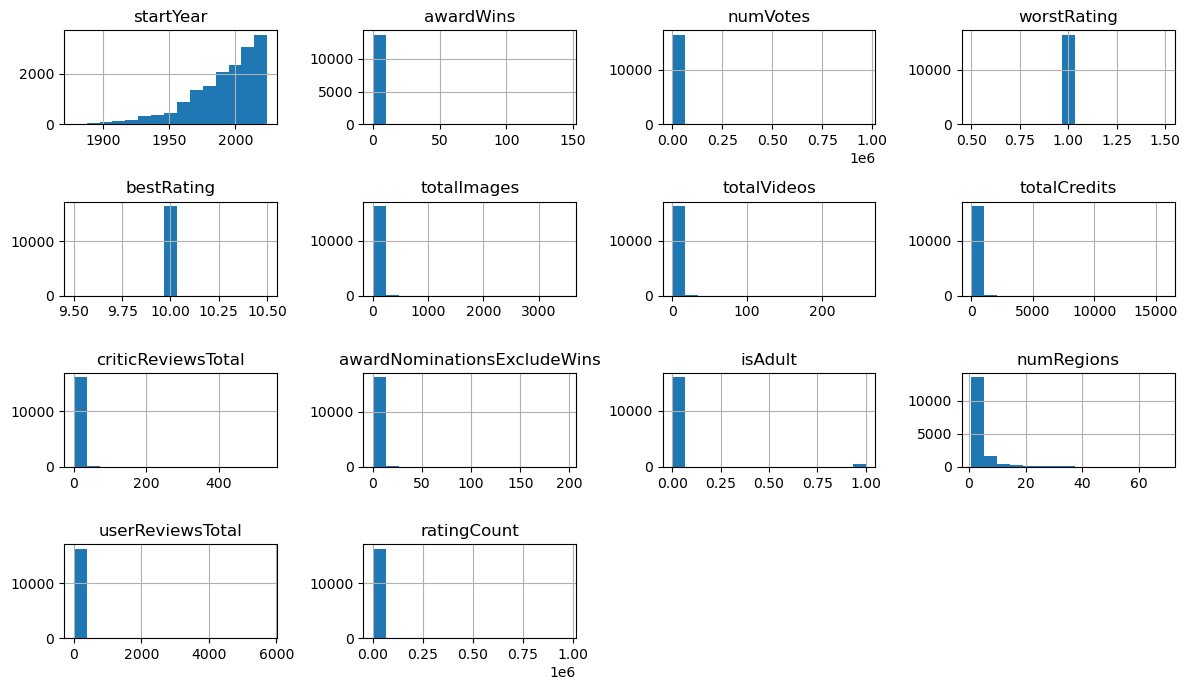

In [10]:
df_tr.hist(figsize=(12,7), bins=15)
plt.tight_layout()
plt.show()

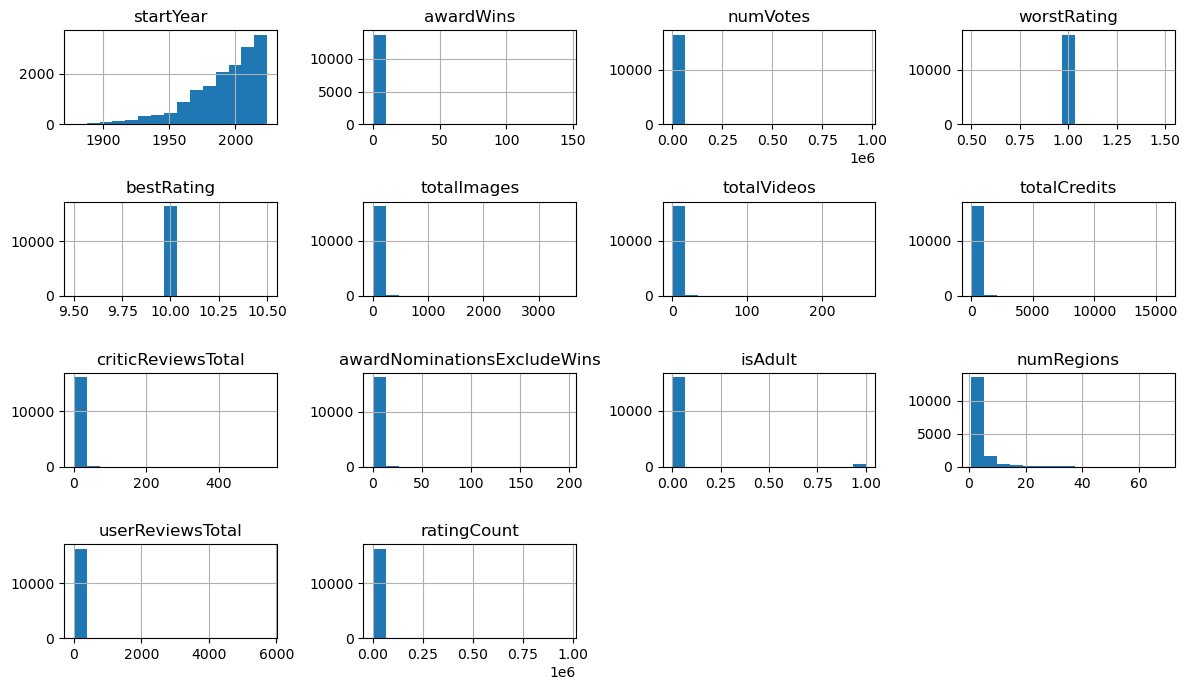

In [11]:
df_te.hist(figsize=(12,7), bins=15)
plt.tight_layout()
plt.show()

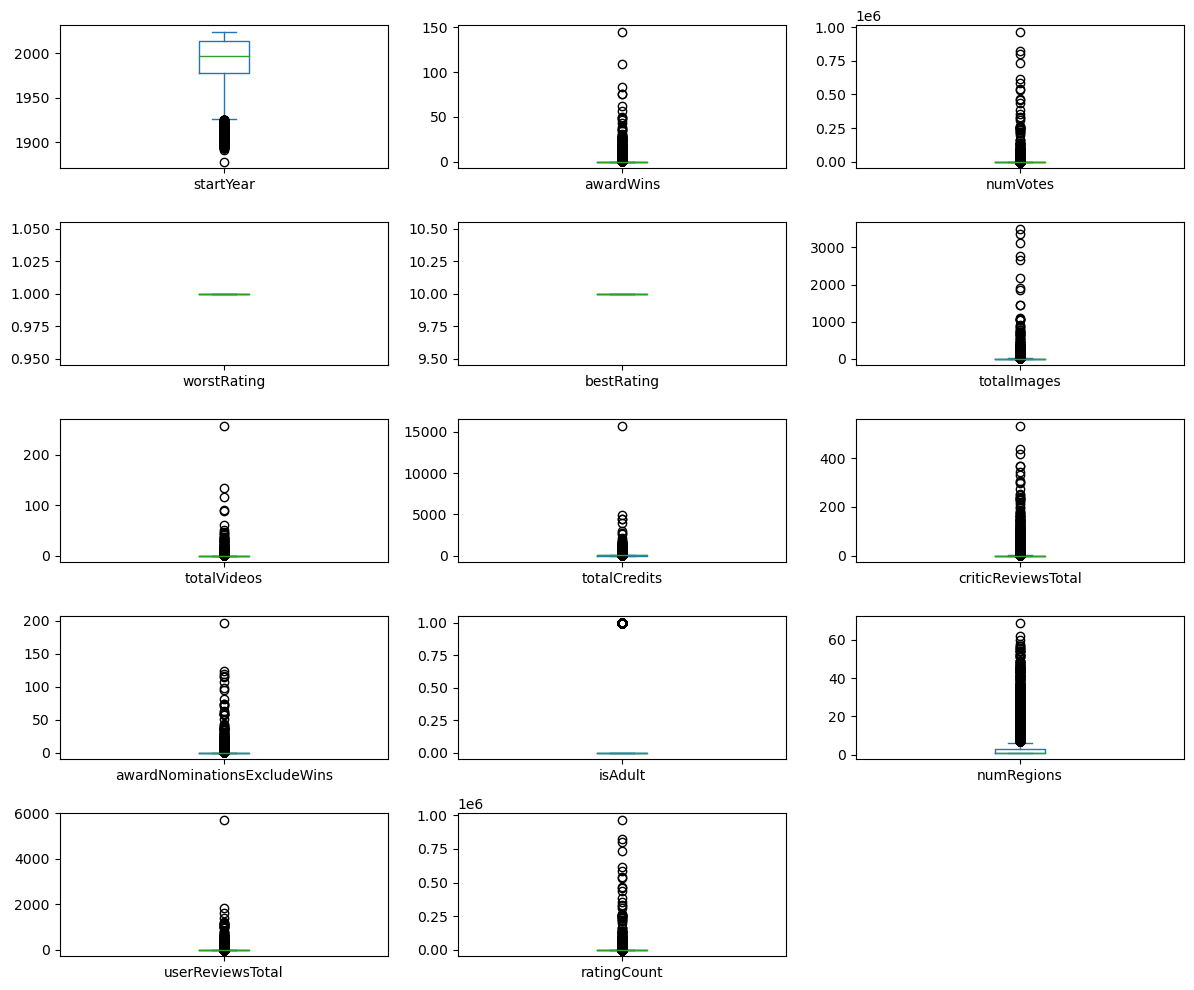

In [72]:
df_tr.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,10), fontsize=10)

plt.tight_layout()
plt.show()

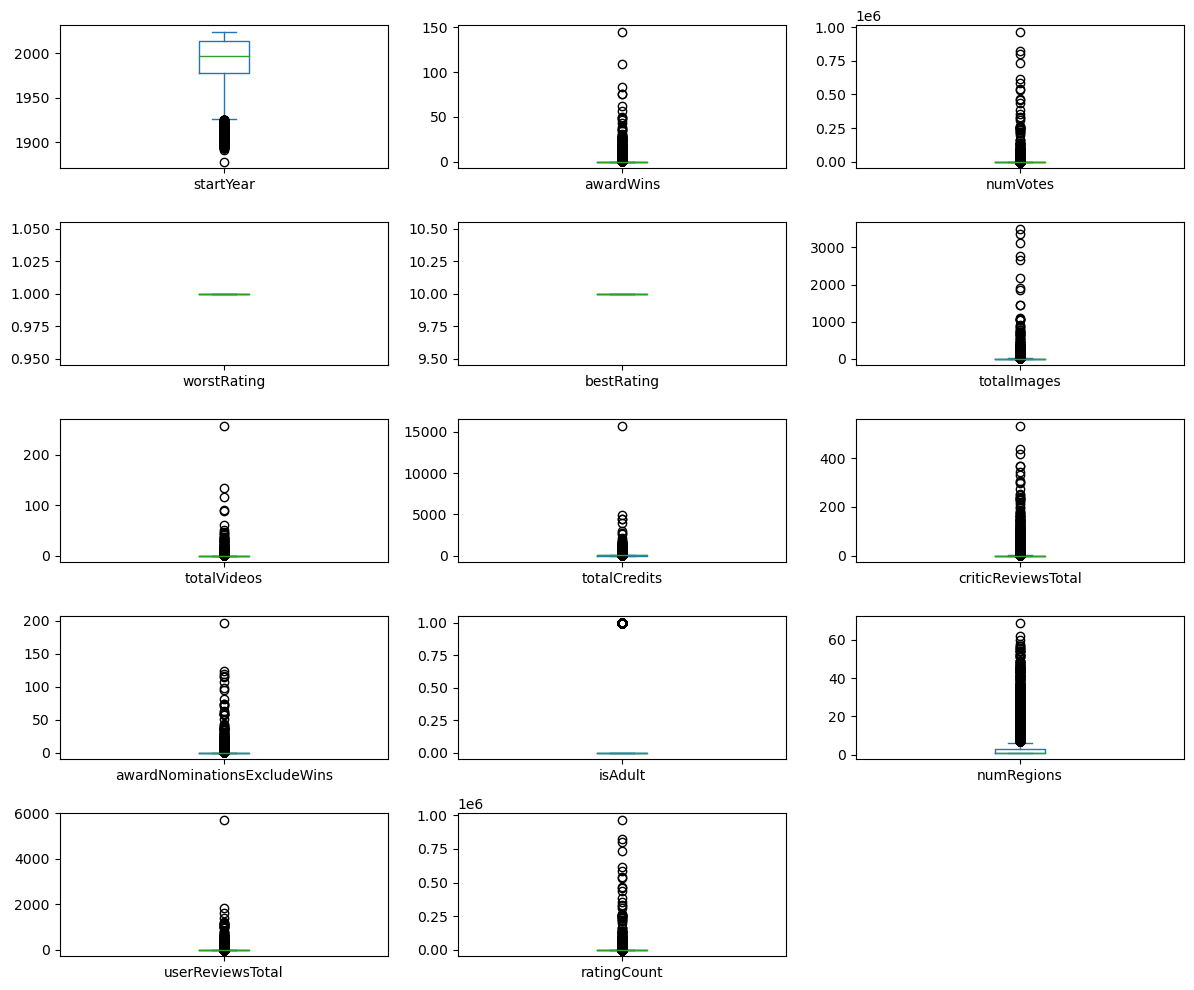

In [25]:
df_te.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,10), fontsize=10)

plt.tight_layout()
plt.show()

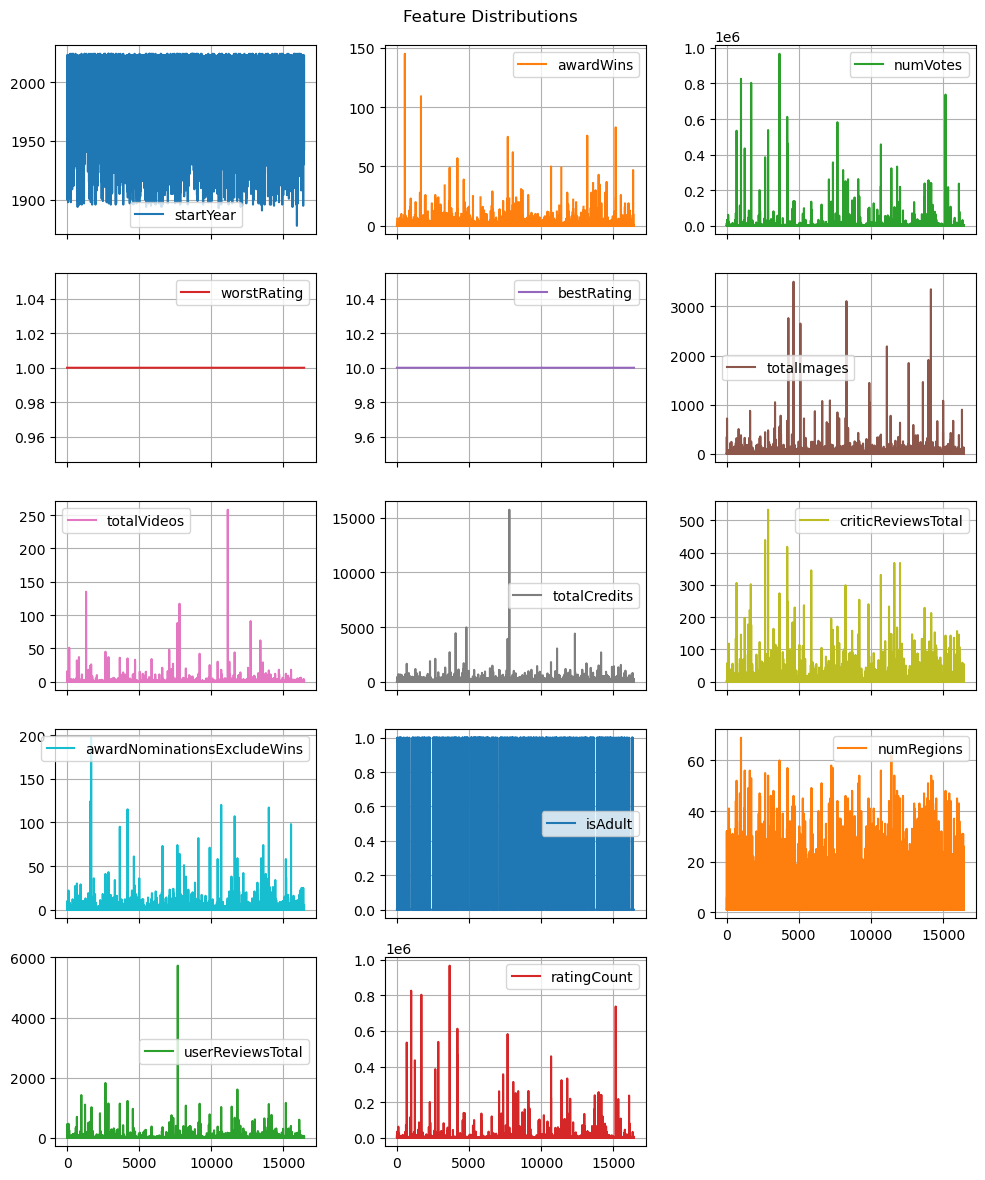

In [32]:
df_train.select_dtypes(include=[int, float]).plot( subplots=True ,figsize=(10, 12),\
                                                  layout=(-1, 3), grid=True, title="Feature Distributions")
plt.tight_layout()
plt.show()


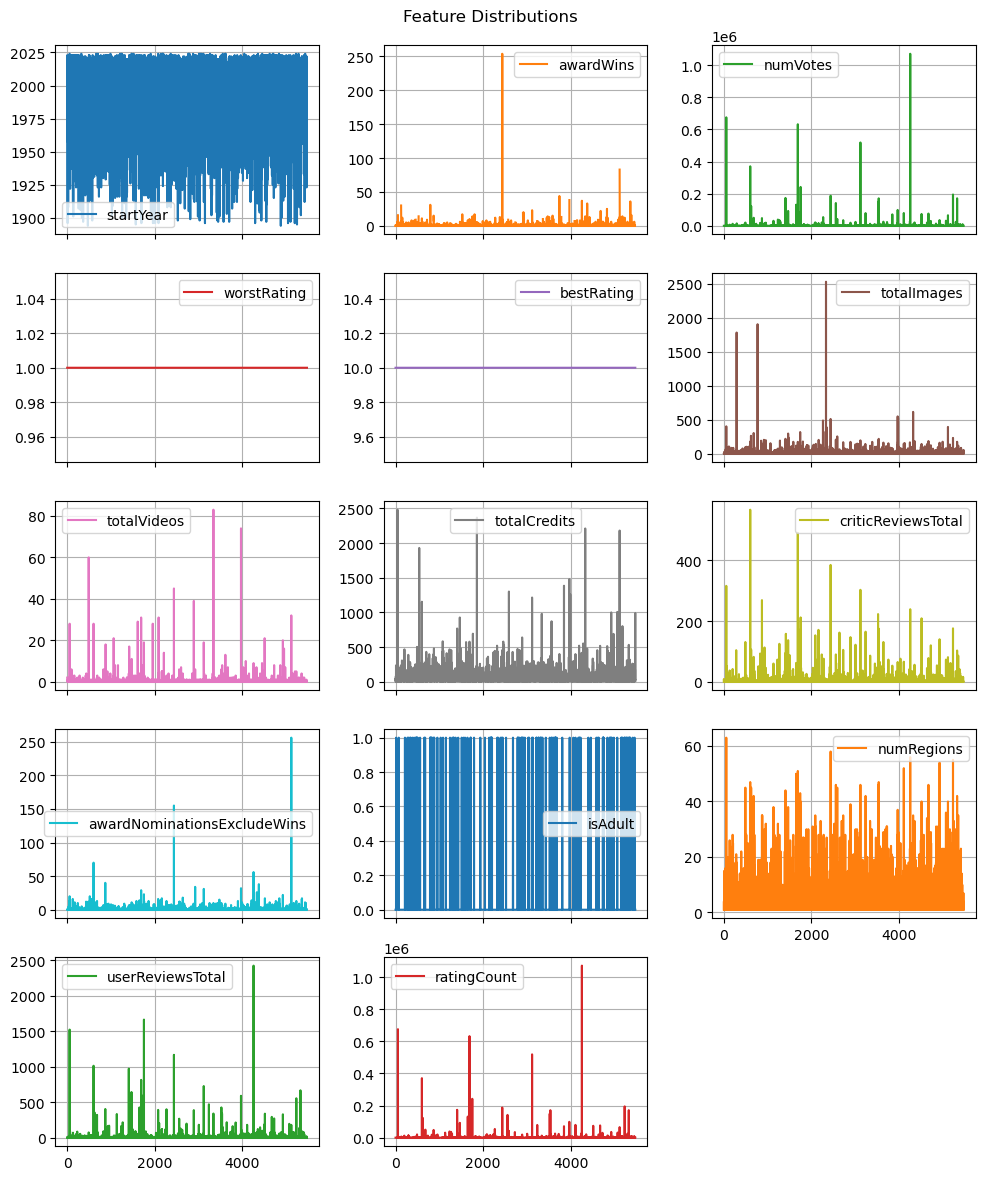

In [33]:
df_test.select_dtypes(include=[int, float]).plot( subplots=True ,figsize=(10, 12),\
                                                  layout=(-1, 3), grid=True, title="Feature Distributions")
plt.tight_layout()
plt.show()


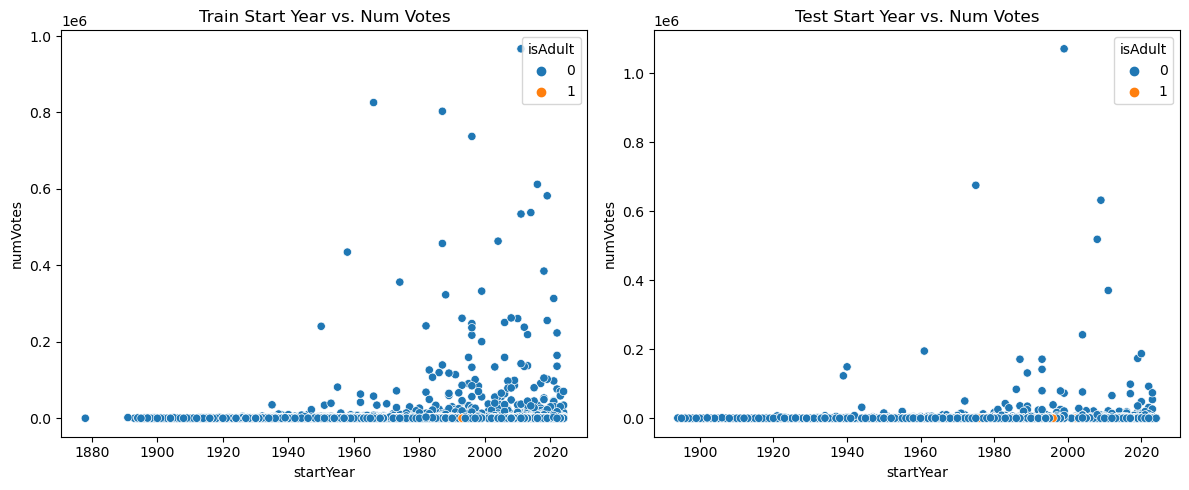

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  


sns.scatterplot(data=df_train, x='startYear', y='numVotes', hue='isAdult', ax=axes[0])
axes[0].set_title("Train Start Year vs. Num Votes")

 
sns.scatterplot(data=df_test, x='startYear', y='numVotes', hue='isAdult', ax=axes[1])
axes[1].set_title("Test Start Year vs. Num Votes")

plt.tight_layout()  
plt.show()

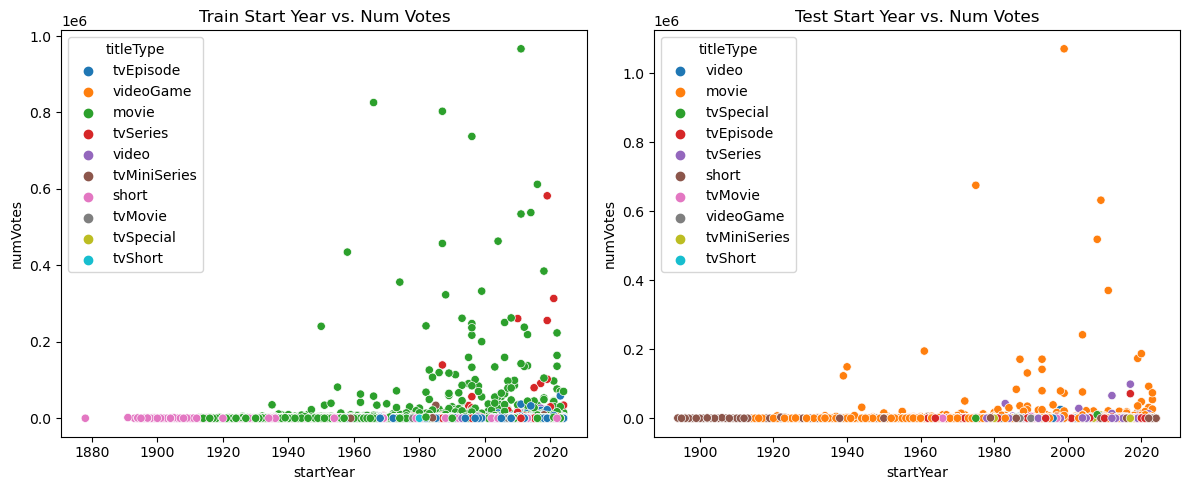

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  


sns.scatterplot(data=df_train, x='startYear', y='numVotes', hue='titleType', ax=axes[0])
axes[0].set_title("Train Start Year vs. Num Votes")

 
sns.scatterplot(data=df_test, x='startYear', y='numVotes', hue='titleType', ax=axes[1])
axes[1].set_title("Test Start Year vs. Num Votes")

plt.tight_layout()  
plt.show()

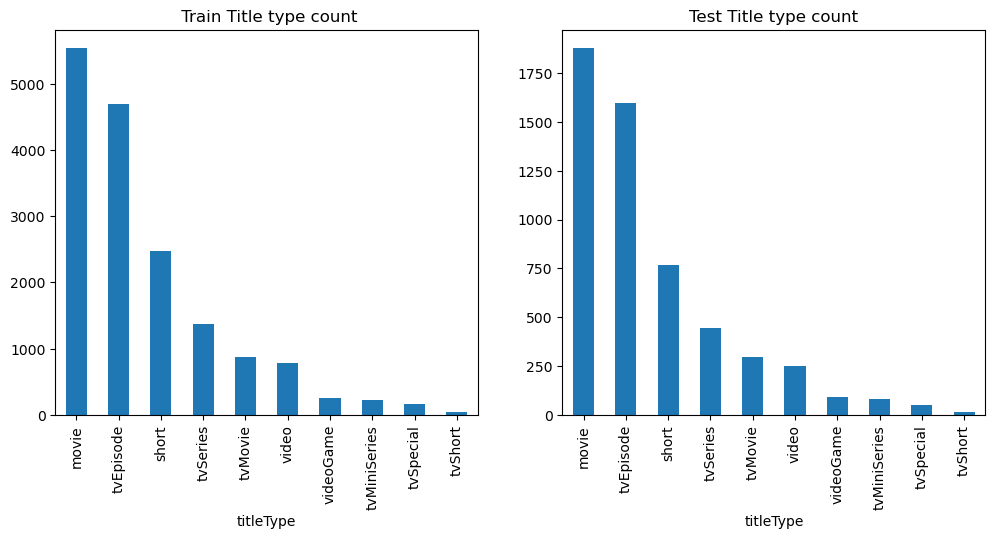

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df_train['titleType'].value_counts().plot(kind='bar', ax=axes[0] ,title=" Train Title type count");
        
df_test['titleType'].value_counts().plot(kind='bar', ax=axes[1],title="Test Title type count");

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3987025433.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


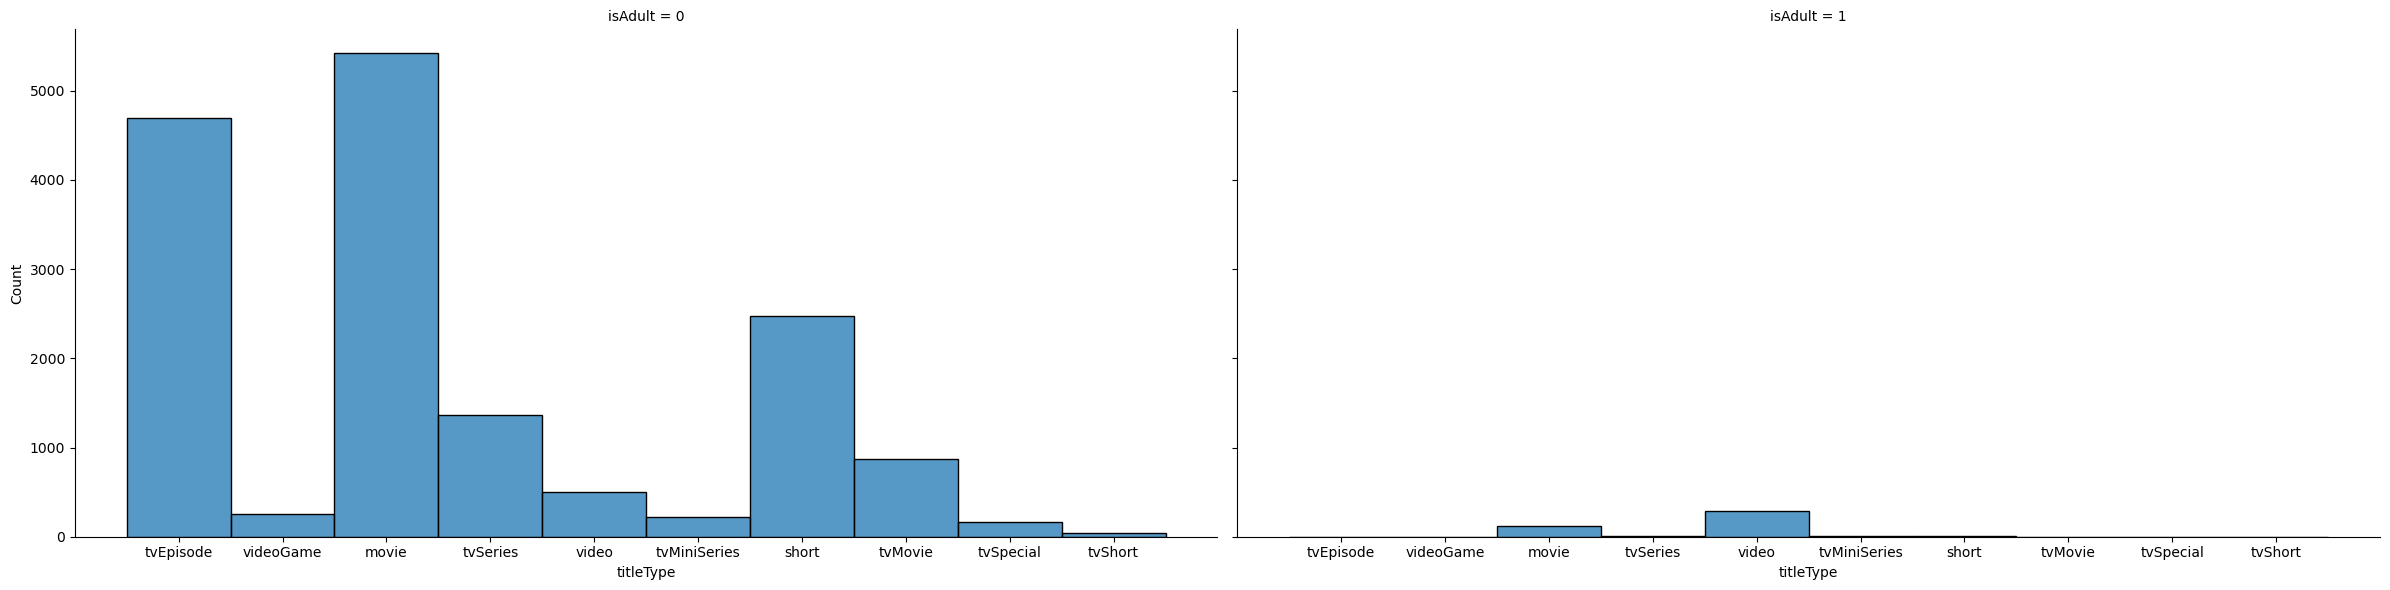

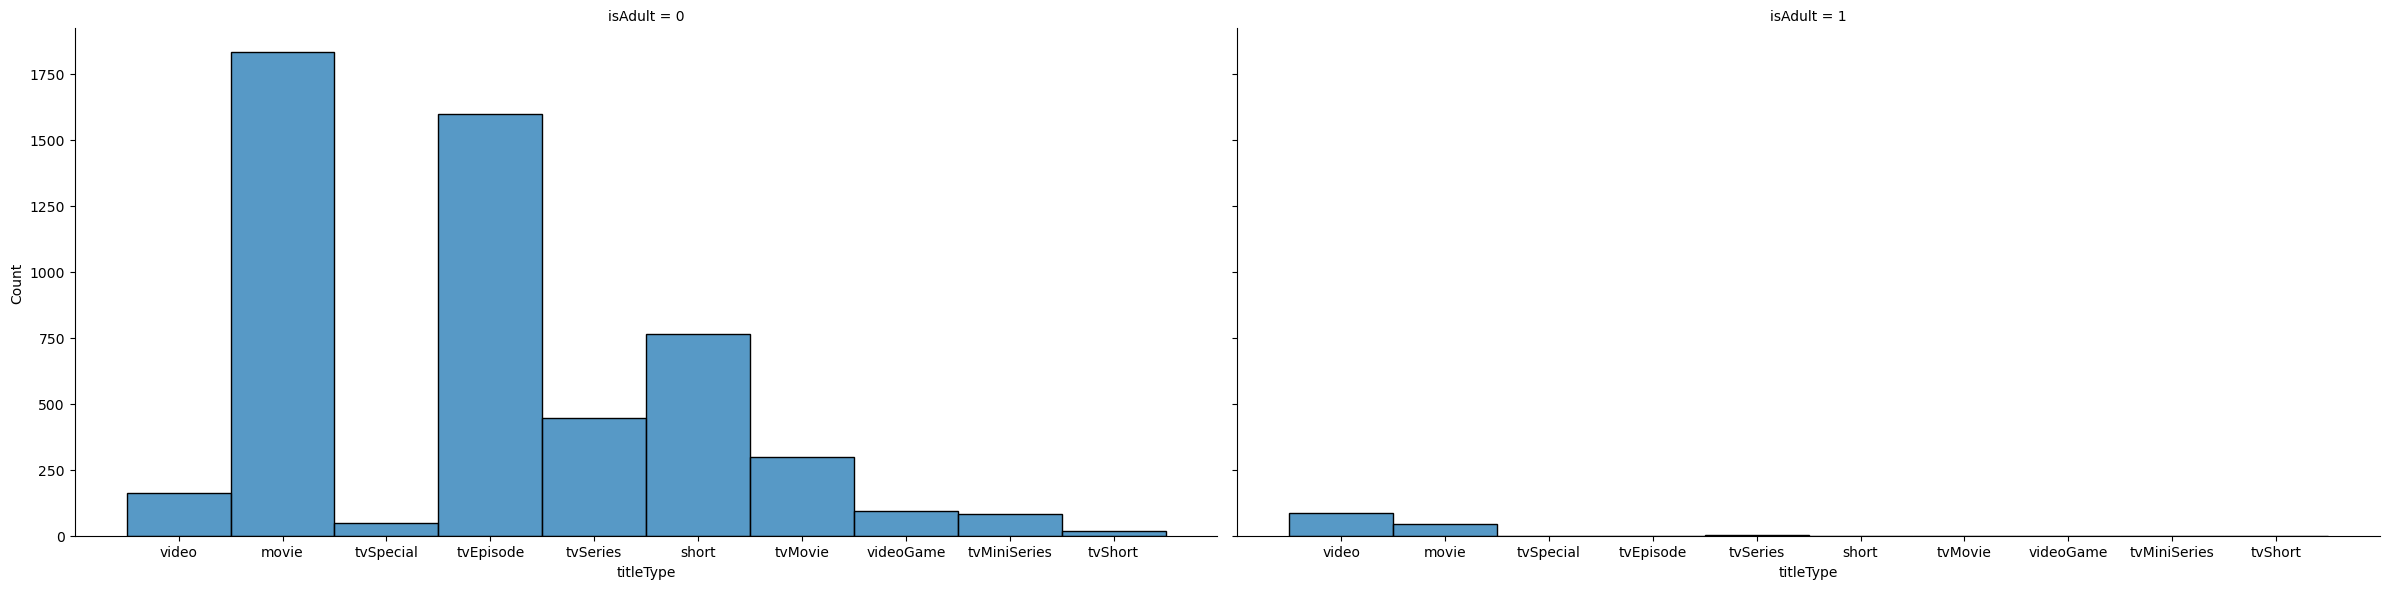

In [45]:
sns.displot(data=df_train, x="titleType", col="isAdult",  height=6, aspect=2, );
sns.displot(data=df_test, x="titleType", col="isAdult",  height=6, aspect=2, );
plt.tight_layout()
plt.show()

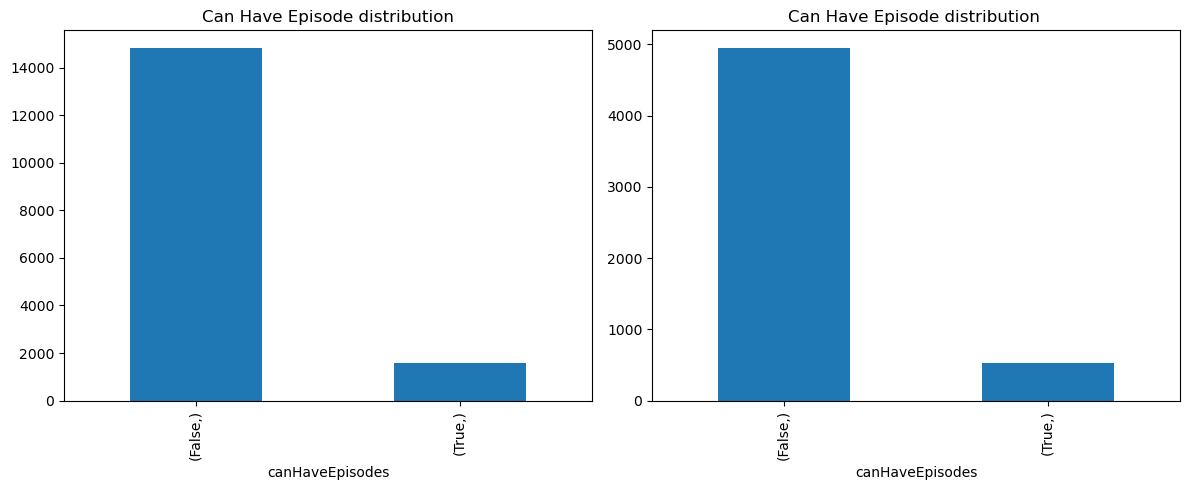

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
df_train[['canHaveEpisodes']].value_counts().plot(kind='bar', ax=axes[0], title="Can Have Episode distribution")
df_test[['canHaveEpisodes']].value_counts().plot(kind='bar', ax=axes[1], title="Can Have Episode distribution ")

plt.tight_layout()
plt.show()

In [57]:
df_train.drop(columns=['bestRating','worstRating'], inplace=True)
df_test.drop(columns=['bestRating','worstRating'], inplace=True)

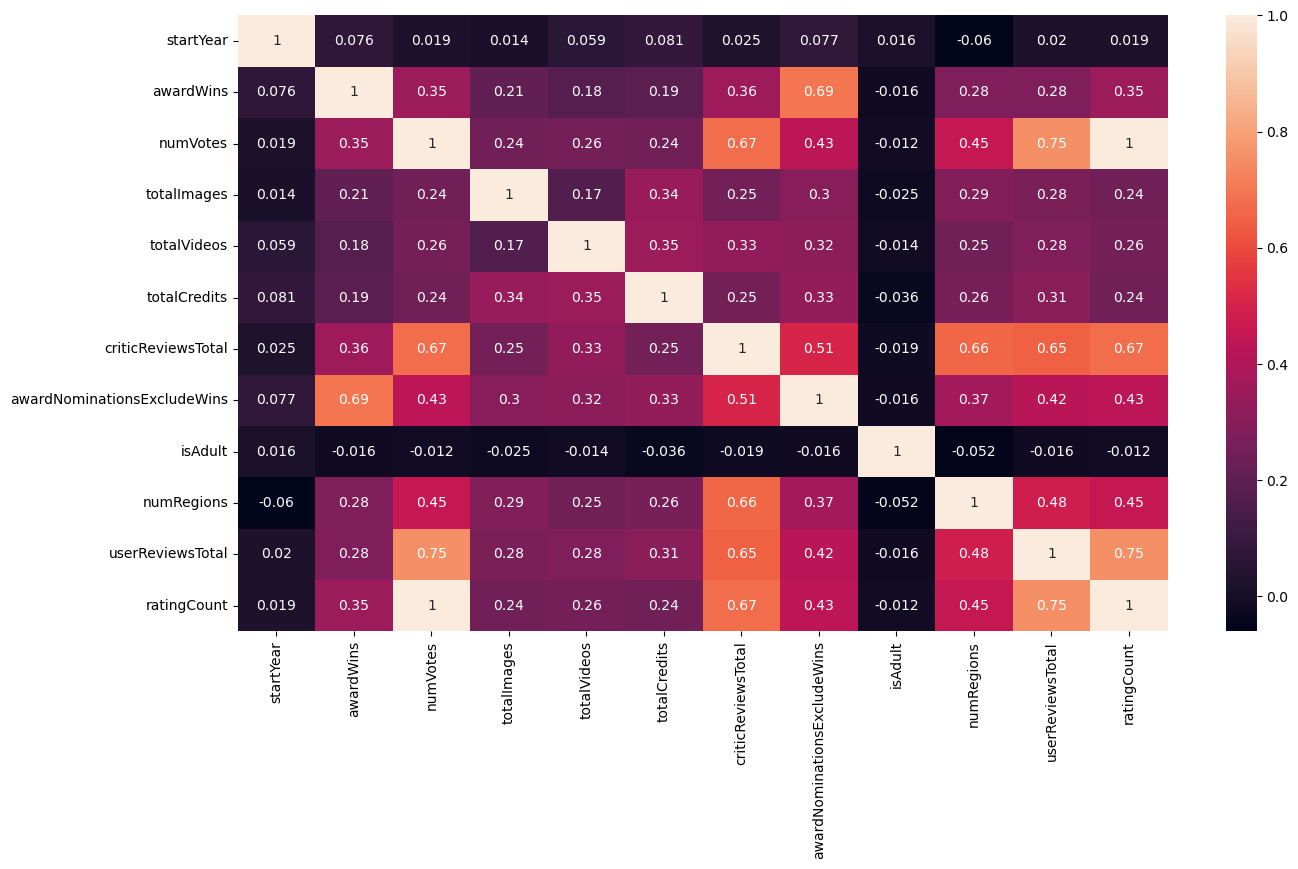

In [58]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.select_dtypes(include=['int', 'float']).corr(), annot=True)
plt.show()

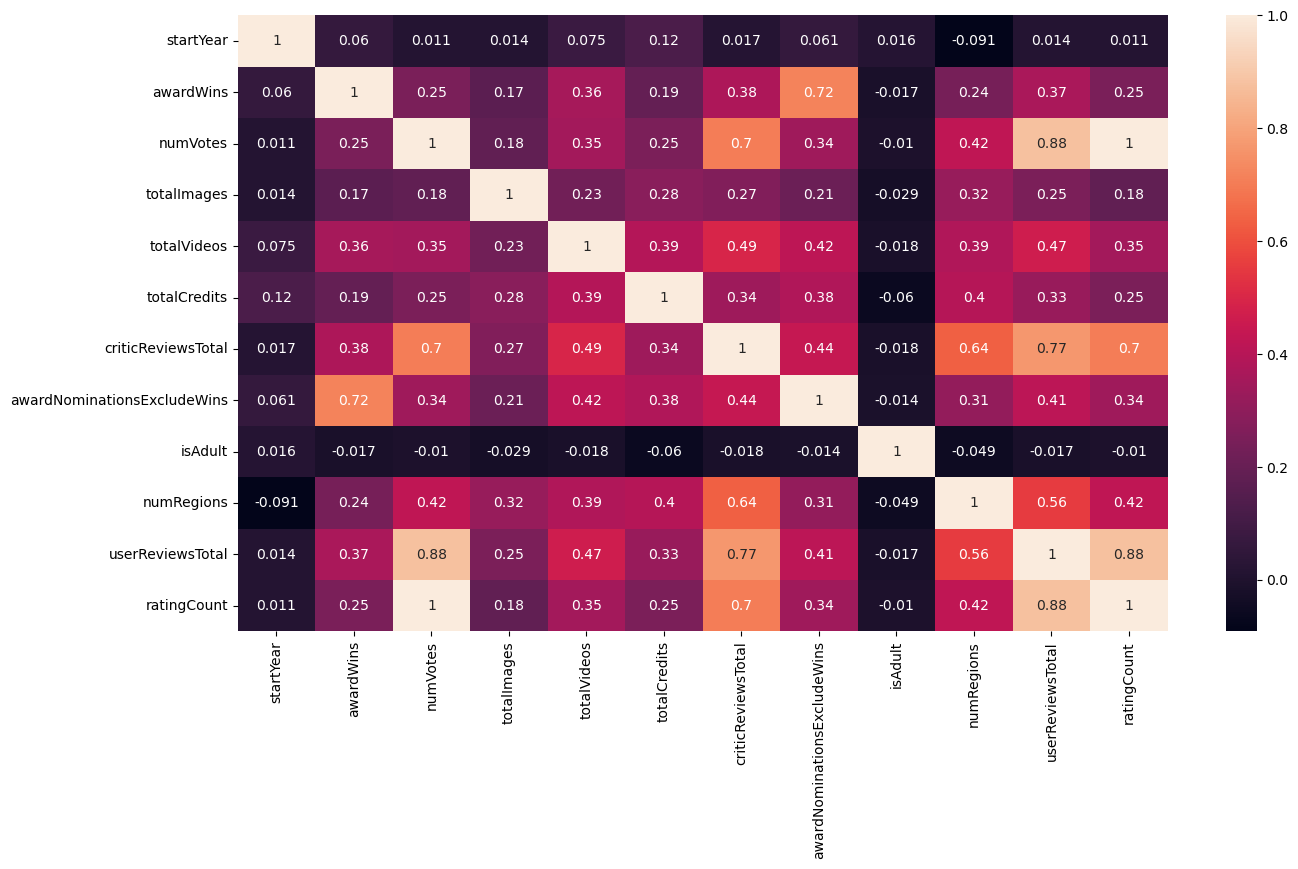

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(df_test.select_dtypes(include=['int', 'float']).corr(), annot=True)
plt.show()

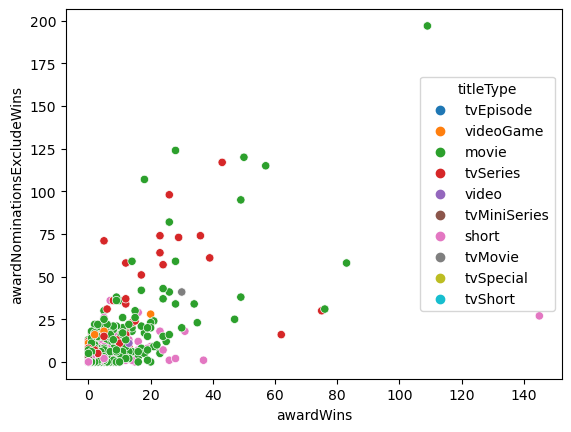

In [76]:
sns.scatterplot(data=df_train, x='awardWins', y='awardNominationsExcludeWins', hue='titleType');

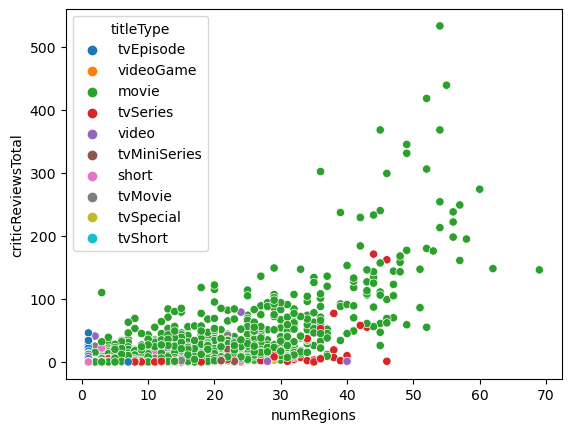

In [106]:
sns.scatterplot(data=df_train, x='numRegions', y='criticReviewsTotal', hue='titleType');

In [87]:
df_train.isna().sum()

originalTitle                     0
rating                            0
startYear                         0
endYear                           0
runtimeMinutes                    0
awardWins                      2618
numVotes                          0
totalImages                       0
totalVideos                       0
totalCredits                      0
criticReviewsTotal                0
titleType                         0
awardNominationsExcludeWins       0
canHaveEpisodes                   0
isRatable                         0
isAdult                           0
numRegions                        0
userReviewsTotal                  0
ratingCount                       0
countryOfOrigin                   0
genres                            0
dtype: int64

In [102]:
df_test.isna().sum()

originalTitle                    0
rating                           0
startYear                        0
endYear                          0
runtimeMinutes                   0
awardWins                      887
numVotes                         0
totalImages                      0
totalVideos                      0
totalCredits                     0
criticReviewsTotal               0
titleType                        0
awardNominationsExcludeWins      0
canHaveEpisodes                  0
isRatable                        0
isAdult                          0
numRegions                       0
userReviewsTotal                 0
ratingCount                      0
countryOfOrigin                  0
genres                           0
dtype: int64

In [103]:
df_train['awardWins']=df_train['awardWins'].fillna(df_train['awardWins'].mode()[0])
df_test['awardWins']=df_test['awardWins'].fillna(df_test['awardWins'].mode()[0])

In [104]:
(df_train == '\\N').sum()

originalTitle                      0
rating                             0
startYear                          0
endYear                        15617
runtimeMinutes                  4852
awardWins                          0
numVotes                           0
totalImages                        0
totalVideos                        0
totalCredits                       0
criticReviewsTotal                 0
titleType                          0
awardNominationsExcludeWins        0
canHaveEpisodes                    0
isRatable                          0
isAdult                            0
numRegions                         0
userReviewsTotal                   0
ratingCount                        0
countryOfOrigin                    0
genres                           382
dtype: int64

In [107]:
(df_test == '\\N').sum()

originalTitle                     0
rating                            0
startYear                         0
endYear                        5205
runtimeMinutes                 1660
awardWins                         0
numVotes                          0
totalImages                       0
totalVideos                       0
totalCredits                      0
criticReviewsTotal                0
titleType                         0
awardNominationsExcludeWins       0
canHaveEpisodes                   0
isRatable                         0
isAdult                           0
numRegions                        0
userReviewsTotal                  0
ratingCount                       0
countryOfOrigin                   0
genres                          121
dtype: int64

In [111]:
df_train[['runtimeMinutes']].describe(include='all')

,runtimeMinutes
count,16431
unique,244
top,\N
freq,4852


In [131]:
df_train['runtimeMinutes'] = df_train['runtimeMinutes'].replace('\\N', np.nan)
df_test['runtimeMinutes'] = df_test['runtimeMinutes'].replace('\\N', np.nan)

In [135]:
df_train['runtimeMinutes'] = pd.to_numeric(df_train['runtimeMinutes'].fillna(df_train['runtimeMinutes'].mode()[0]))
df_test['runtimeMinutes'] = pd.to_numeric(df_test['runtimeMinutes'].fillna(df_test['runtimeMinutes'].mode()[0]))

0        21
1        30
2        30
3        30
4        90
       ... 
5473    141
5474     22
5475     85
5476     30
5477     30
Name: runtimeMinutes, Length: 5478, dtype: int64

In [134]:
df_train['genres'] = df_train['genres'].replace('\\N', np.nan)
df_test['genres'] = df_test['genres'].replace('\\N', np.nan)

In [139]:
df_train['genres'] = df_train['genres'].fillna(df_train['genres']=='Unknown')
df_test['genres'] = df_test['genres'].fillna(df_test['genres']=='Unknown')